# Efficient Estimation of Word Representations in Vector Space

# 向量空间中单词表示的有效估计

## Abstract

## 摘要

We propose two novel model architectures for computing continuous vector representations of words from very large data sets. The quality of these representations is measured in a word similarity task, and the results are compared to the previously best performing techniques based on different types of neural networks. We observe large improvements in accuracy at much lower computational cost, i.e. it takes less than a day to learn high quality word vectors from a 1.6 billion words data set. Furthermore, we show that these vectors provide state-of-the-art performance on our test set for measuring syntactic and semantic word similarities.

我们提出了两种新的模型结构，用于计算来自非常大数据集的单词的连续向量表示。这些表示的质量在单词相似度任务中进行了测量，并将结果与基于不同类型神经网络的先前性能最佳的技术进行了比较。我们观察到精度有了很大的提高，计算成本大大降低，也就是说，从16亿字的数据集中学习高质量的字向量只需不到一天的时间。此外，我们还证明了这些向量在我们的测试集上提供了最先进的性能，可用于测量句法和语义词的相似性。

### 1 Introduction

### 1 简介

Many current NLP systems and techniques treat words as atomic units - there is no notion of similarity between words, as these are represented as indices in a vocabulary. This choice has several good reasons - simplicity, robustness and the observation that simple models trained on huge amounts of data outperform complex systems trained on less data. An example is the popular N-gram model used for statistical language modeling - today, it is possible to train N-grams on virtually all available data (trillions of words [3]). However, the simple techniques are at their limits in many tasks. For example, the amount of relevant in-domain data for automatic speech recognition is limited - the performance is usually dominated by the size of high quality transcribed speech data (often just millions of words). In machine translation, the existing corpora for many languages contain only a few billions of words or less. Thus, there are situations where simple scaling up of the basic techniques will not result in any significant progress, and we have to focus on more advanced techniques. With progress of machine learning techniques in recent years, it has become possible to train more complex models on much larger data set, and they typically outperform the simple models. Probably the most successful concept is to use distributed representations of words [10]. For example, neural network based language models significantly outperform N-gram models [1, 27, 17].

许多当前的NLP系统和技术将单词视为原子单位-单词之间没有相似性的概念，因为它们被表示为词汇表中的索引。这种选择有几个很好的理由——简单性、稳健性和观察到，在大量数据上训练的简单模型比在较少数据上训练的复杂系统表现得更好。一个例子是用于统计语言建模的流行N-gram模型——今天，可以在几乎所有可用数据（万亿字[3]）上训练N-gram。然而，在许多任务中，简单的技术都处于极限。例如，用于自动语音识别的相关域内数据的数量是有限的——性能通常由高质量的转录语音数据（通常只有数百万字）的大小决定。在机器翻译中，许多语言的现有语料库只包含几十亿个单词或更少。因此，在某些情况下，简单地扩展基本技术不会带来任何重大进展，我们必须关注更先进的技术。随着近年来机器学习技术的进步，在更大的数据集上训练更复杂的模型已经成为可能，而且它们通常比简单的模型表现得更好。可能最成功的概念是使用单词的分布式表示[10]。例如，基于神经网络的语言模型明显优于N-gram模型[1，27，17]。


### 1.1 Goals of the Paper

### 1.1 本文件的目标

The main goal of this paper is to introduce techniques that can be used for learning high-quality word vectors from huge data sets with billions of words, and with millions of words in the vocabulary. As far as we know, none of the previously proposed architectures has been successfully trained on more than a few hundred of millions of words, with a modest dimensionality of the word vectors between 50 - 100.

We use recently proposed techniques for measuring the quality of the resulting vector representations, with the expectation that not only will similar words tend to be close to each other, but that words can have multiple degrees of similarity [20]. This has been observed earlier in the context of inflectional languages - for example, nouns can have multiple word endings, and if we search for similar words in a subspace of the original vector space, it is possible to find words that have similar endings [13, 14].

Somewhat surprisingly, it was found that similarity of word representations goes beyond simple syntactic regularities. Using a word offset technique where simple algebraic operations are performed on the word vectors, it was shown for example that vector(”King”) - vector(”Man”) + vector(”Woman”) results in a vector that is closest to the vector representation of the word Queen [20].

In this paper, we try to maximize accuracy of these vector operations by developing new model architectures that preserve the linear regularities among words. We design a new comprehensive test set for measuring both syntactic and semantic regularities1, and show that many such regularities can be learned with high accuracy. Moreover, we discuss how training time and accuracy depends on the dimensionality of the word vectors and on the amount of the training data.

本文的主要目标是介绍一些技术，这些技术可以用于从包含数十亿个单词和数百万个单词的海量数据集中学习高质量的单词向量。据我们所知，之前提出的架构中，没有一个成功地训练了数亿个单词，单词向量的维数在50-100之间。



我们使用最近提出的技术来测量产生的向量表示的质量，期望不仅相似的词趋向于彼此接近，而且词可以具有多个相似度[20]。这在屈折语言的上下文中已经观察到了——例如，名词可以有多个词的结尾，如果我们在原始向量空间的子空间中搜索相似的词，就有可能找到有相似结尾的词[13，14]。



有点令人惊讶的是，人们发现单词表示的相似性超出了简单的句法规则。使用在单词向量上形成简单代数运算的单词偏移技术，例如，向量（“King”）-向量（“Man”）+向量（“Woman”）产生最接近单词Queen的向量表示的向量[20]。



在本文中，我们试图通过开发新的模型架构来最大限度地提高这些向量运算的准确性，这种架构可以保持词之间的线性正则性。我们设计了一个新的综合测试集来测量句法和语义规则1，并表明许多这样的规则可以被高精度地学习。此外，我们还讨论了训练时间和准确性如何取决于词向量的维数和训练数据的数量。

### 1.2 Previous Work

### 1.2 前期工作

Representation of words as continuous vectors has a long history [10, 26, 8]. A very popular model architecture for estimating neural network language model (NNLM) was proposed in [1], where a feedforward neural network with a linear projection layer and a non-linear hidden layer was used to learn jointly the word vector representation and a statistical language model. This work has been followed by many others.

词作为连续向量的表示有很长的历史[10，26，8]。文献[1]提出了一种非常流行的神经网络语言模型（NNLM）估计模型结构，该结构利用一个线性投影层和一个非线性隐藏层的前向神经网络来联合学习词向量表示和一个统计语言模型。这项工作之后还有许多其他工作。

Another interesting architecture of NNLM was presented in [13, 14], where the word vectors are first learned using neural network with a single hidden layer. The word vectors are then used to train the NNLM. Thus, the word vectors are learned even without constructing the full NNLM. In this work, we directly extend this architecture, and focus just on the first step where the word vectors are learned using a simple model.

NNLM的另一个有趣的结构在文献[13，14]中提出，其中单词向量首先是使用具有单个隐藏层的神经网络来学习的。然后使用词向量训练NNLM。因此，即使不构造完整的NNLM，也可以学习单词向量。在这项工作中，我们直接扩展了这个体系结构，并且只关注使用简单模型学习单词向量的第一步。

It was later shown that the word vectors can be used to significantly improve and simplify many NLP applications [4, 5, 29]. Estimation of the word vectors itself was performed using different model architectures and trained on various corpora [4, 29, 23, 19, 9], and some of the resulting word vectors were made available for future research and comparison2. However, as far as we know, these architectures were significantly more computationally expensive for training than the one proposed in [13], with the exception of certain version of log-bilinear model where diagonal weight matrices are used [23].

后来的研究表明，词向量可以用来显著地改进和简化许多NLP应用[4，5，29]。使用不同的模型结构对词向量本身进行估计，并在各种语料库上进行训练[4、29、23、19、9]，得到的一些词向量可用于将来的研究和比较2。然而，据我们所知，这些体系结构在训练时的计算成本明显高于[13]中提出的体系结构，除了使用对角权矩阵的对数双线性模型的某些版本之外[23]。

### 2 Model Architectures

### 2 模型架构

Many different types of models were proposed for estimating continuous representations of words, including the well-known Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA).

人们提出了许多不同的模型来估计词的连续表示，包括著名的潜在语义分析（LSA）和潜在Dirichlet分配（LDA）。

In this paper, we focus on distributed representations of words learned by neural networks, as it was previously shown that they perform significantly better than LSA for preserving linear regularities among words [20, 31]; LDA moreover becomes computationally very expensive on large data sets.

在这篇文章中，我们主要关注由神经网络学习的单词的分布表示，因为之前的研究表明，它们在保持单词之间的线性正则性方面明显优于LSA[20，31]；此外，LDA在大型数据集上的计算变得非常昂贵。

Similar to [18], to compare different model architectures we define first the computational complexity of a model as the number of parameters that need to be accessed to fully train the model. Next, we will try to maximize the accuracy, while minimizing the computational complexity.

与[18]类似，为了比较不同的模型架构，我们首先将模型的计算复杂度定义为需要访问的参数数量，以便对模型进行全面训练。下一步，我们将尽量提高精度，同时尽量降低计算复杂度。

For all the following models, the training complexity is proportional to

对于以下所有模型，训练复杂度与

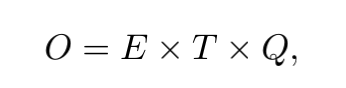

where E is number of the training epochs, T is the number of the words in the training set and Q is defined further for each model architecture. Common choice is E = 3 50 and T up to one billion.
All models are trained using stochastic gradient descent and backpropagation [26].

其中E是训练阶段的数目，T是训练集中单词的数目，Q是为每个模型架构进一步定义的。通常的选择是E=350，T高达10亿。
所有模型都使用随机梯度下降和反向传播进行训练[26]。

### 2.1 Feedforward Neural Net Language Model (NNLM)

### 前馈神经网络语言模型（NNLM）

The probabilistic feedforward neural network language model has been proposed in [1]. It consists of input, projection, hidden and output layers. At the input layer, N previous words are encoded using 1-of-V coding, where V is size of the vocabulary. The input layer is then projected to a projection layer P that has dimensionality N × D, using a shared projection matrix. As only N inputs are active at any given time, composition of the projection layer is a relatively cheap operation.
The NNLM architecture becomes complex for computation between the projection and the hidden layer, as values in the projection layer are dense. For a common choice of N = 10, the size of the projection layer (P) might be 500 to 2000, while the hidden layer size H is typically 500 to 1000 units. Moreover, the hidden layer is used to compute probability distribution over all the words in the vocabulary, resulting in an output layer with dimensionality V . Thus, the computational complexity
per each training example is

文献[1]提出了概率前馈神经网络语言模型。它由输入层、投影层、隐藏层和输出层组成。在输入层，前面的N个单词使用1/V编码进行编码，其中V是词汇表的大小。然后使用共享投影矩阵将输入层投影到具有维数N×D的投影层P。由于在任何给定时间只有N个输入是活动的，所以投影层的构成是相对廉价的操作。
由于投影层中的值密集，NNLM体系结构对于投影层和隐藏层之间的计算变得复杂。对于N＝10的公共选择，投影层（P）的大小可以是500到2000，而隐藏层大小H通常是500到1000个单位。此外，隐层用于计算词汇表中所有单词的概率分布，从而得到具有维数V的输出层。因此，计算复杂性
每个训练示例

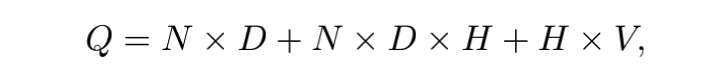

where the dominating term is H × V . However, several practical solutions were proposed for avoiding it; either using hierarchical versions of the softmax [25, 23, 18], or avoiding normalized models completely by using models that are not normalized during training [4, 9]. With binary tree representations of the vocabulary, the number of output units that need to be evaluated can go down to around log2(V ). Thus, most of the complexity is caused by the term N × D × H.
In our models, we use hierarchical softmax where the vocabulary is represented as a Huffman binary tree. This follows previous observations that the frequency of words works well for obtaining classes in neural net language models [16]. Huffman trees assign short binary codes to frequent words, and this further reduces the number of output units that need to be evaluated: while balanced binary tree would require log2(V ) outputs to be evaluated, the Huffman tree based hierarchical softmax requires only about log2(Unigram perplexity(V )). For example when the vocabulary size is one million words, this results in about two times speedup in evaluation. While this is not crucial speedup for neural network LMs as the computational bottleneck is in the N ×D×H term, we will later propose architectures that do not have hidden layers and thus depend heavily on the efficiency of the softmax normalization.

其中主项是H×V。然而，为了避免这种情况，人们提出了一些实用的解决方案：要么使用softmax的分层版本[25、23、18]，要么使用在训练期间没有标准化的模型完全避免标准化模型[4、9]。对于词汇表的二叉树表示，需要计算的输出单元的数量可以降到log2（V）左右。因此，大多数复杂性是由项N×D×H引起的。
在我们的模型中，我们使用分层的softmax，其中词汇表表示为Huffman二叉树。在此之前的观察表明，在神经网络语言模型中，单词的频率对于获取类很有效[16]。哈夫曼树将短二进制代码分配给频繁的单词，这进一步减少了需要评估的输出单元的数量：虽然平衡二叉树需要评估log2（V）输出，但基于哈夫曼树的层次软max只需要大约log2（Unigram compensity（V））。例如，当词汇量为一百万个单词时，这将导致大约两倍的评估速度。虽然这对于神经网络LMs来说不是关键的加速，因为计算瓶颈在N×D×H项，但我们稍后将提出不具有隐藏层的架构，因此在很大程度上依赖于softmax规范化的效率。

### 2.2 Recurrent Neural Net Language Model (RNNLM)

### 2.2 递归神经网络语言模型（RNNLM）

Recurrent neural network based language model has been proposed to overcome certain limitations of the feedforward NNLM, such as the need to specify the context length (the order of the model N), and because theoretically RNNs can efficiently represent more complex patterns than the shallow neural networks [15, 2]. The RNN model does not have a projection layer; only input, hidden and output layer. What is special for this type of model is the recurrent matrix that connects hidden layer to itself, using time-delayed connections. This allows the recurrent model to form some kind of short term memory, as information from the past can be represented by the hidden layer state that gets updated based on the current input and the state of the hidden layer in the previous time step.
The complexity per training example of the RNN model is

基于递归神经网络的语言模型克服了前向NNLM的某些局限性，例如需要指定上下文长度（模型N的阶数），并且由于理论上RNNs可以有效地表示比浅层神经网络更复杂的模式[15，2]。RNN模型没有投影层；只有输入、隐藏和输出层。这种模型的特殊之处在于使用延时连接将隐藏层连接到自身的递归矩阵。这使得递归模型能够形成某种短期记忆，因为过去的信息可以由隐藏层状态表示，该隐藏层状态根据当前输入和上一时间步中隐藏层的状态进行更新。

RNN模型的每个训练示例的复杂性为

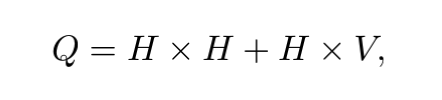

where the word representations D have the same dimensionality as the hidden layer H. Again, the term H × V can be efficiently reduced to H × log2(V ) by using hierarchical softmax. Most of the complexity then comes from H × H.

其中，单词表示D与隐藏层H具有相同的维数。同样，通过使用层次softmax，术语H×V可以有效地降为H×log2（V）。大多数复杂性来自H×H。



### 2.3 Parallel Training of Neural Networks

### 2.3 神经网络的并行训练

To train models on huge data sets, we have implemented several models on top of a large-scale distributed framework called DistBelief [6], including the feedforward NNLM and the new models proposed in this paper. The framework allows us to run multiple replicas of the same model in parallel, and each replica synchronizes its gradient updates through a centralized server that keeps all the parameters. For this parallel training, we use mini-batch asynchronous gradient descent with an adaptive learning rate procedure called Adagrad [7]. Under this framework, it is common to use one hundred or more model replicas, each using many CPU cores at different machines in a data center.

为了在海量数据集上训练模型，我们在一个称为distfilte[6]的大型分布式框架上实现了几个模型，包括前馈NNLM和本文提出的新模型。该框架允许我们并行运行同一模型的多个副本，每个副本通过一个保存所有参数的集中式服务器同步其渐变更新。对于这种并行训练，我们使用一种称为Adagrad[7]的自适应学习率过程的小批量异步梯度下降。在这个框架下，通常使用100个或更多的模型副本，每个副本在数据中心的不同机器上使用多个CPU核心。

### 3 New Log-linear Models

### 3 新的对数线性模型

In this section, we propose two new model architectures for learning distributed representations of words that try to minimize computational complexity. The main observation from the previous section was that most of the complexity is caused by the non-linear hidden layer in the model. While this is what makes neural networks so attractive, we decided to explore simpler models that might not be able to represent the data as precisely as neural networks, but can possibly be trained on much more data efficiently.
The new architectures directly follow those proposed in our earlier work [13, 14], where it was found that neural network language model can be successfully trained in two steps: first, continuous word vectors are learned using simple model, and then the N-gram NNLM is trained on top of these distributed representations of words. While there has been later substantial amount of work that focuses on learning word vectors, we consider the approach proposed in [13] to be the simplest one. Note that related models have been proposed also much earlier [26, 8].

在这一部分中，我们提出了两种新的模型架构，用于学习尽量减少计算复杂度的单词的分布式表示。前一节的主要观察结果是，模型的大部分复杂性是由模型中的非线性隐藏层引起的。虽然这正是神经网络如此吸引人的原因，但我们决定探索更简单的模型，这些模型可能无法像神经网络那样精确地表示数据，但可能可以在更有效的数据上进行训练。

新的体系结构直接遵循了我们先前的工作[13，14]中提出的，发现神经网络语言模型可以通过两个步骤成功地训练：首先，使用简单的模型学习连续的词向量，然后在这些词的分布表示的基础上训练N-gram NNLM。虽然后来有大量的工作集中在学习词向量上，但我们认为[13]中提出的方法是最简单的。请注意，相关模型的提出也要早得多[26，8]。

### 3.1 Continuous Bag-of-Words Model

### 3.1 连续文字袋模型

The first proposed architecture is similar to the feedforward NNLM, where the non-linear hidden layer is removed and the projection layer is shared for all words (not just the projection matrix); thus, all words get projected into the same position (their vectors are averaged). We call this architecture a bag-of-words model as the order of words in the history does not influence the projection. Furthermore, we also use words from the future; we have obtained the best performance on the task
introduced in the next section by building a log-linear classifier with four future and four history words at the input, where the training criterion is to correctly classify the current (middle) word. 
Training complexity is then

第一种架构类似于前向NNLM，在NNLM中，非线性隐藏层被移除，投影层被共享给所有单词（不仅仅是投影矩阵）；因此，所有单词被投影到相同的位置（它们的向量被平均）。我们称这种架构为一个单词袋模型，因为历史上单词的顺序不会影响投影。此外，我们还使用将来的单词；我们通过在输入端构建一个包含四个将来和四个历史单词的对数线性分类器，在下一节介绍的任务中获得了最佳性能，其中训练准则是正确分类当前（中间）单词。

那么训练的复杂性

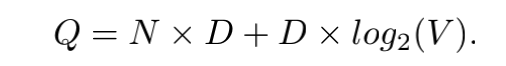

We denote this model further as CBOW, as unlike standard bag-of-words model, it uses continuous distributed representation of the context. The model architecture is shown at Figure 1. Note that the weight matrix between the input and the projection layer is shared for all word positions in the same way as in the NNLM.

我们将这个模型进一步称为CBOW，因为它不同于标准的词包模型，它使用上下文的连续分布表示。模型架构如图1所示。请注意，输入层和投影层之间的权重矩阵对于所有字位置是共享的，其方式与NNLM中的相同。

### 3.2 Continuous Skip-gram Model

### 3.2 连续跳格模型

The second architecture is similar to CBOW, but instead of predicting the current word based on the context, it tries to maximize classification of a word based on another word in the same sentence.
More precisely, we use each current word as an input to a log-linear classifier with continuous projection layer, and predict words within a certain range before and after the current word. We found that increasing the range improves quality of the resulting word vectors, but it also increases the computational complexity. Since the more distant words are usually less related to the current word than those close to it, we give less weight to the distant words by sampling less from those words in our training examples.
The training complexity of this architecture is proportional to

第二种结构类似于CBOW，但它不根据上下文预测当前单词，而是尝试最大化基于同一句子中另一个单词的单词分类。
更准确地说，我们将每个当前单词作为一个具有连续投影层的对数线性分类器的输入，在当前单词前后一定范围内预测单词。我们发现，增加范围可以提高结果词向量的质量，但同时也增加了计算复杂度。由于距离越远的单词通常与当前单词的关联性越小，因此我们在训练示例中通过从这些单词中抽取较少的单词来减少距离单词的权重。
该体系结构的训练复杂性与

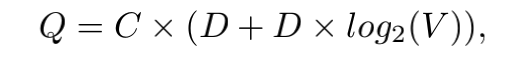

where C is the maximum distance of the words. Thus, if we choose C = 5, for each training word we will select randomly a number R in range < 1; C >, and then use R words from history and

其中C是单词的最大距离。因此，如果我们选择C=5，对于每个训练单词，我们将随机选择一个在<1；C>范围内的数字R，然后使用历史和

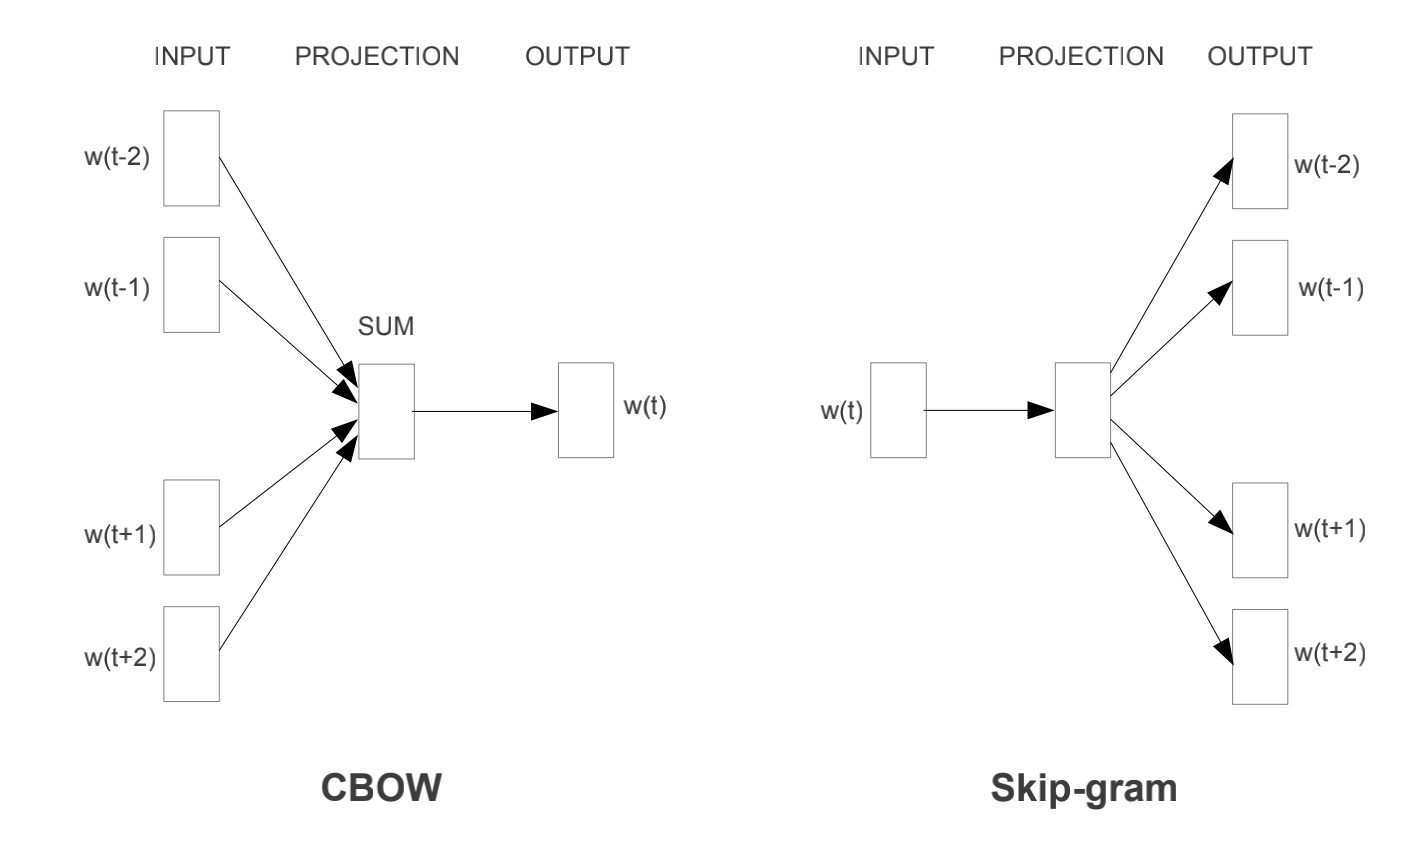

Figure 1: New model architectures. The CBOW architecture predicts the current word based on the context, and the Skip-gram predicts surrounding words given the current word.

R words from the future of the current word as correct labels. This will require us to do R × 2 word classifications, with the current word as input, and each of the R + R words as output. In the following experiments, we use C = 10.

图1：新的模型架构。CBOW体系结构根据上下文预测当前单词，而Skip gram根据当前单词预测周围单词。

R词从现在的词的未来作为正确的标签。这就需要我们用当前单词作为输入，每个R+R单词作为输出，对R×2单词进行分类。在下面的实验中，我们使用C=10。

## 4 Results

## 4 结果

To compare the quality of different versions of word vectors, previous papers typically use a table showing example words and their most similar words, and understand them intuitively. Although it is easy to show that word France is similar to Italy and perhaps some other countries, it is much more challenging when subjecting those vectors in a more complex similarity task, as follows. We follow previous observation that there can be many different types of similarities between words, for
example, word big is similar to bigger in the same sense that small is similar to smaller. Example of another type of relationship can be word pairs big - biggest and small - smallest [20]. We further denote two pairs of words with the same relationship as a question, as we can ask: ”What is the word that is similar to small in the same sense as biggest is similar to big?” Somewhat surprisingly, these questions can be answered by performing simple algebraic operations with the vector representation of words. To find a word that is similar to small in the same sense as
biggest is similar to big, we can simply compute vector X = vector(”biggest”) vector(”big”) + vector(”small”). Then, we search in the vector space for the word closest to X measured by cosine distance, and use it as the answer to the question (we discard the input question words during this search). When the word vectors are well trained, it is possible to find the correct answer (word smallest) using this method.
Finally, we found that when we train high dimensional word vectors on a large amount of data, the resulting vectors can be used to answer very subtle semantic relationships between words, such as a city and the country it belongs to, e.g. France is to Paris as Germany is to Berlin. Word vectors with such semantic relationships could be used to improve many existing NLP applications, such as machine translation, information retrieval and question answering systems, and may enable other
future applications yet to be invented.

为了比较不同版本的词向量的质量，以前的论文通常使用一个表格来显示示例词及其最相似的词，并直观地理解它们。尽管很容易表明法语和意大利以及其他一些国家很相似，但在将这些向量置于一个更复杂的相似性任务中时，其挑战性要大得多，如下所示。我们遵循之前的观察，单词之间可能有许多不同类型的相似性，因为
例如，“大”一词与“大”相似，正如“小”与“小”相似。另一种类型的关系可以是单词对大-大-小-小[20]。我们进一步表示两个词，它们之间的关系与一个问题相同，就像我们可以问的那样：“在同一意义上，小和大相似的词是什么？”？有些令人惊讶的是，这些问题可以通过对单词的向量表示执行简单的代数运算来得到答案。找到一个与small相似的单词
最大的类似于大的，我们可以简单地计算向量X=向量（“最大”）向量（“大”）+向量（“小”）。然后，我们在向量空间中搜索以余弦距离度量的最接近X的单词，并将其用作问题的答案（在搜索过程中丢弃输入的问题单词）。当单词向量经过良好的训练后，使用这种方法就有可能找到正确的答案（单词最小）。
最后，我们发现当我们在大量数据上训练高维词向量时，得到的向量可以用来回答词之间非常微妙的语义关系，例如城市和它所属的国家，例如法国是巴黎，德国是柏林。具有这种语义关系的词向量可以用于改进许多现有的NLP应用，例如机器翻译、信息检索和问答系统，并且可以使其他的NLP应用
未来的应用尚待开发。

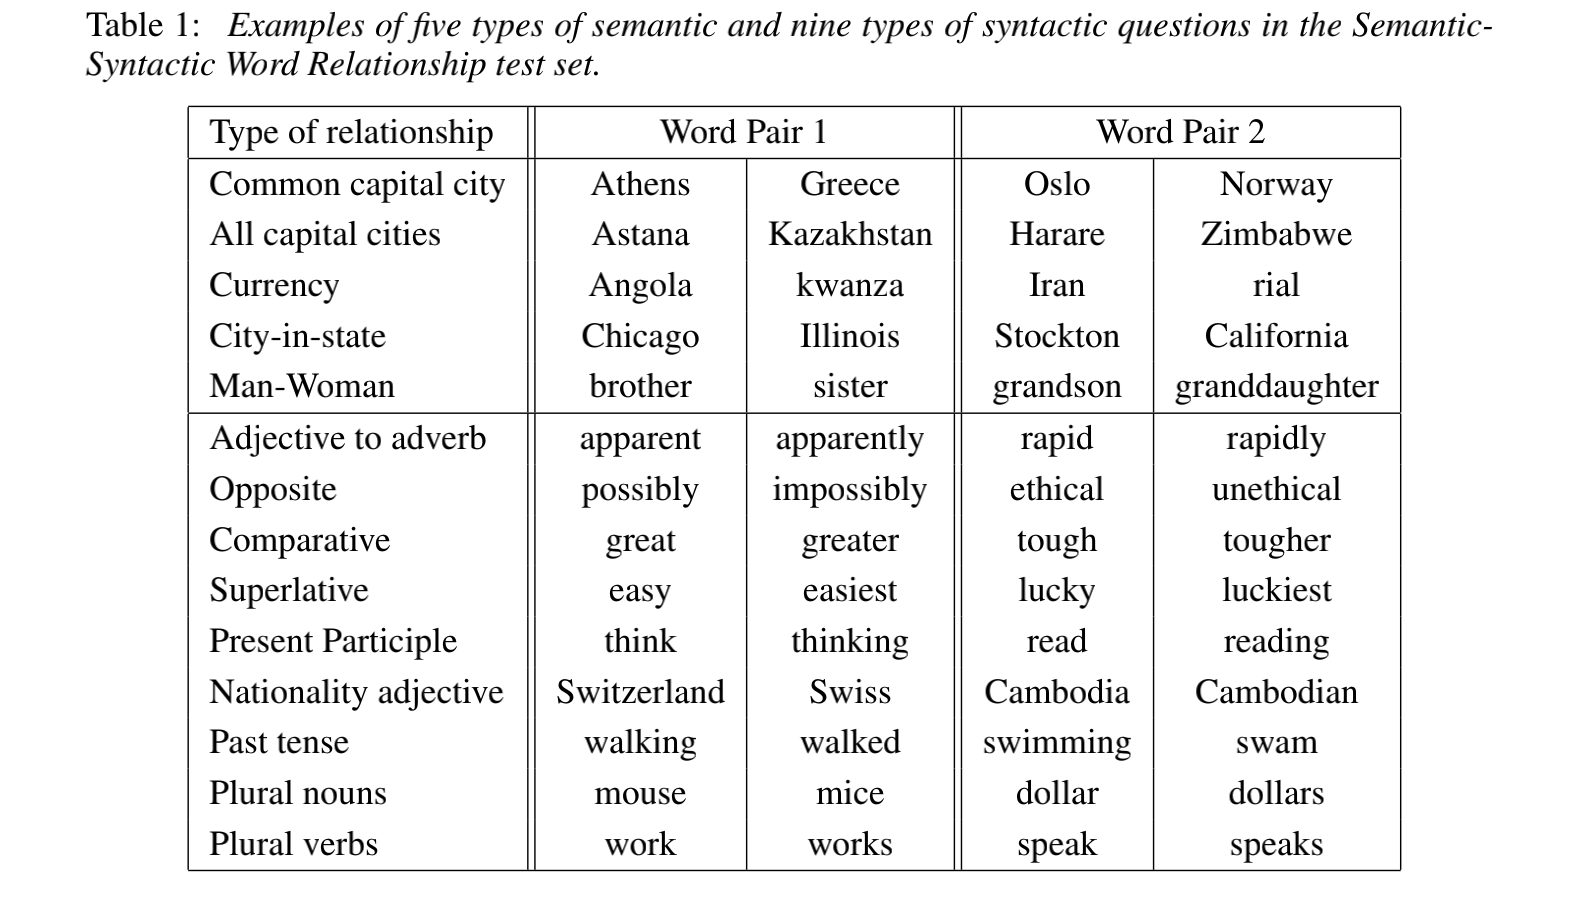

表1：语义句法词关系测试集中的五类语义和九类句法问题的例子。

### 4.1 Task Description

### 4.1 任务描述

To measure quality of the word vectors, we define a comprehensive test set that contains five types of semantic questions, and nine types of syntactic questions. Two examples from each category are shown in Table 1. Overall, there are 8869 semantic and 10675 syntactic questions. The questions in each category were created in two steps: first, a list of similar word pairs was created manually. Then, a large list of questions is formed by connecting two word pairs. For example, we made a list of 68 large American cities and the states they belong to, and formed about 2.5K questions by picking two word pairs at random. We have included in our test set only single token words, thus multi-word entities are not present (such as New York).
We evaluate the overall accuracy for all question types, and for each question type separately (semantic, syntactic). Question is assumed to be correctly answered only if the closest word to the vector computed using the above method is exactly the same as the correct word in the question; synonyms are thus counted as mistakes. This also means that reaching 100% accuracy is likely to be impossible, as the current models do not have any input information about word morphology. However, we believe that usefulness of the word vectors for certain applications should be positively correlated with this accuracy metric. Further progress can be achieved by incorporating information about structure of words, especially for the syntactic questions.

为了测量词向量的质量，我们定义了一个包含五类语义问题和九类句法问题的综合测试集。表1显示了每个类别的两个示例。总的来说，有8869个语义问题和10675个句法问题。每个类别中的问题都是通过两个步骤创建的：首先，手动创建一个类似单词对的列表。然后，通过连接两个词对形成一个大的问题列表。例如，我们列出了68个美国大城市及其所属州，通过随机抽取两个词对，形成了约2.5K个问题。我们在测试集中只包含单个标记词，因此不存在多词实体（如纽约）。
我们分别评估所有问题类型和每个问题类型（语义、句法）的总体准确性。只有当用上述方法计算出的与向量最接近的词与问题中的正确词完全相同时，才认为问题得到了正确的答案；因此同义词被视为错误。这也意味着要达到100%的准确率是不可能的，因为目前的模型没有任何关于词法的输入信息。然而，我们认为词向量在某些应用中的有用性应该与这种精确性度量正相关。结合词的结构信息，尤其是句法问题，可以取得更大的进展。

### 4.2 Maximization of Accuracy

### 4.2 精度最大化

We have used a Google News corpus for training the word vectors. This corpus contains about 6B tokens. We have restricted the vocabulary size to 1 million most frequent words. Clearly, we are facing time constrained optimization problem, as it can be expected that both using more data
and higher dimensional word vectors will improve the accuracy. To estimate the best choice of model architecture for obtaining as good as possible results quickly, we have first evaluated models trained on subsets of the training data, with vocabulary restricted to the most frequent 30k words. The results using the CBOW architecture with different choice of word vector dimensionality and increasing amount of the training data are shown in Table 2.

我们使用Google新闻语料库来训练单词向量。这个语料库包含大约6B个标记。我们把词汇量限制在一百万个最常用的单词。显然，我们面临着时间约束的优化问题，因为可以预期，两者都使用更多的数据
而更高维的词向量将提高准确性。为了估计模型结构的最佳选择，以尽快获得尽可能好的结果，我们首先评估了在训练数据子集上训练的模型，词汇限制在最频繁的30k个单词。表2显示了使用CBOW架构的结果，该架构具有不同的字向量维数选择和不断增加的训练数据量。

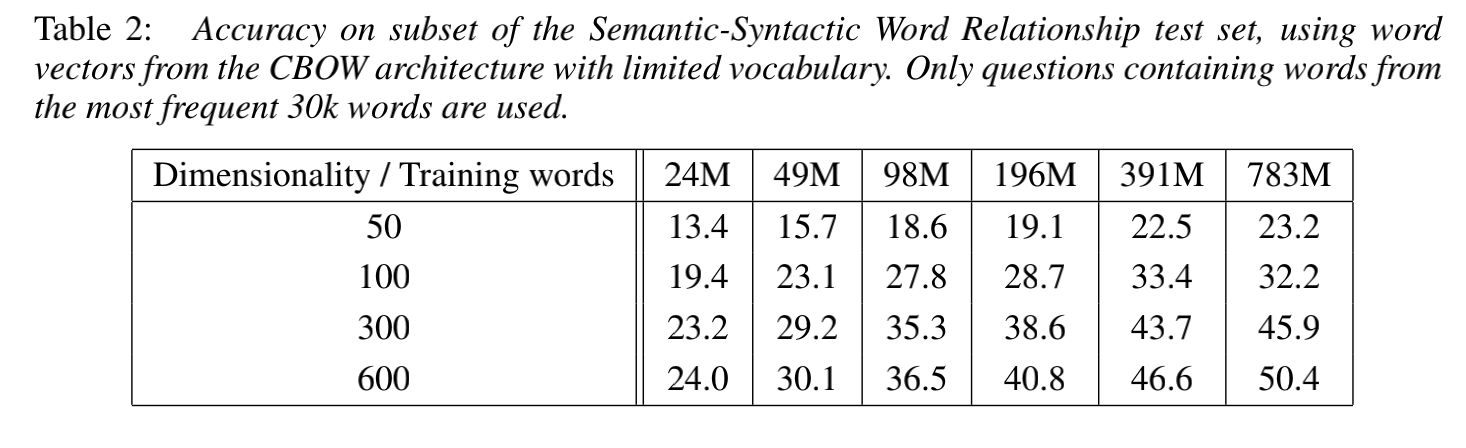

表2：语义-句法-词关系测试集子集的准确性，使用来自有限词汇的CBOW体系结构的词向量。只使用包含最常用的3万个单词的问题。

It can be seen that after some point, adding more dimensions or adding more training data provides diminishing improvements. So, we have to increase both vector dimensionality and the amount of the training data together. While this observation might seem trivial, it must be noted that it is currently popular to train word vectors on relatively large amounts of data, but with insufficient size (such as 50 - 100). Given Equation 4, increasing amount of training data twice results in about the same increase of computational complexity as increasing vector size twice.
For the experiments reported in Tables 2 and 4, we used three training epochs with stochastic gradient descent and backpropagation. We chose starting learning rate 0.025 and decreased it linearly, so that it approaches zero at the end of the last training epoch.

可以看出，在某个点之后，添加更多维度或添加更多训练数据提供了递减的改进。因此，我们必须同时增加向量维数和训练数据量。虽然这种观察可能看起来微不足道，但必须指出的是，目前流行的做法是在相对大量的数据上训练单词向量，但其大小不够（例如50-100）。给定方程4，训练数据量增加两倍，计算复杂度的增加与向量大小增加两倍的结果大致相同。
对于表2和表4中报告的实验，我们使用了三个具有随机梯度下降和反向传播的训练阶段。我们选择起始学习率0.025，并将其线性降低，使其在最后一个训练周期结束时接近于零。

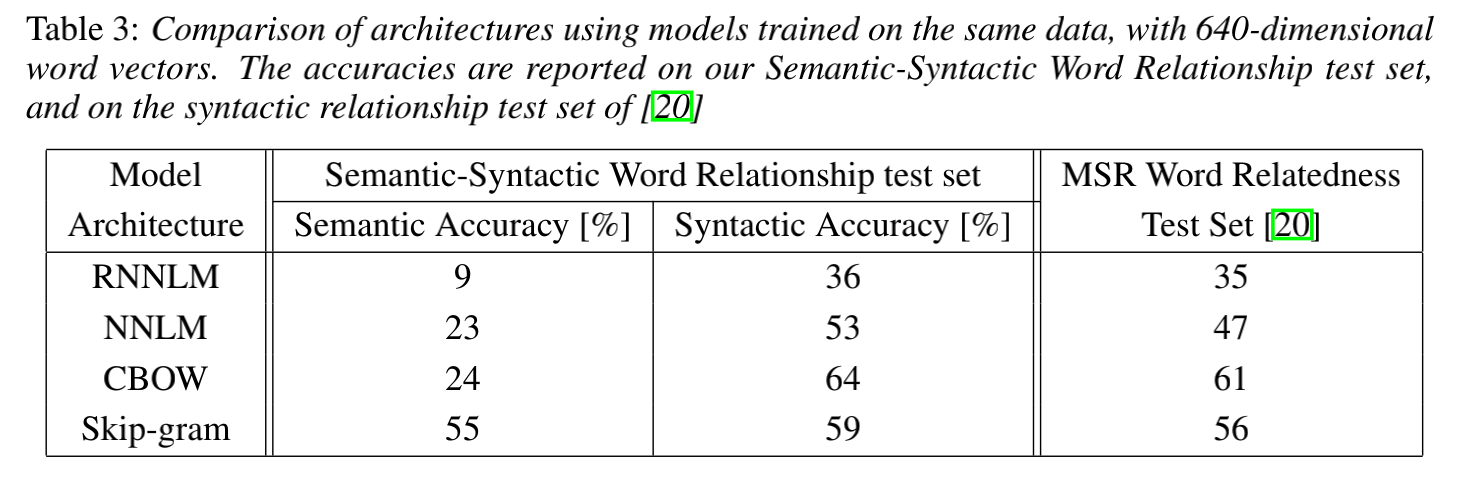

表3：使用在相同数据上训练的模型的体系结构与640维字向量的比较。我们的语义-句法-词关系测试集和[20]的句法关系测试集报告了这些准确性

### 4.3 Comparison of Model Architectures

### 4.3 模型架构比较

First we compare different model architectures for deriving the word vectors using the same training data and using the same dimensionality of 640 of the word vectors. In the further experiments, we use full set of questions in the new Semantic-Syntactic Word Relationship test set, i.e. unrestricted to the 30k vocabulary. We also include results on a test set introduced in [20] that focuses on syntactic similarity between words3.
The training data consists of several LDC corpora and is described in detail in [18] (320M words, 82K vocabulary). We used these data to provide a comparison to a previously trained recurrent neural network language model that took about 8 weeks to train on a single CPU. We trained a feedforward NNLM with the same number of 640 hidden units using the DistBelief parallel training [6], using a history of 8 previous words (thus, the NNLM has more parameters than the RNNLM, as the
projection layer has size 640 × 8).
In Table 3, it can be seen that the word vectors from the RNN (as used in [20]) perform well mostly on the syntactic questions. The NNLM vectors perform significantly better than the RNN - this is not surprising, as the word vectors in the RNNLM are directly connected to a non-linear hidden layer. The CBOW architecture works better than the NNLM on the syntactic tasks, and about the same on the semantic one. Finally, the Skip-gram architecture works slightly worse on the syntactic task than the CBOW model (but still better than the NNLM), and much better on the semantic part of the test than all the other models.，

首先，我们比较了使用相同训练数据和使用640个词向量的相同维数来推导词向量的不同模型结构。在进一步的实验中，我们在新的语义-句法-词关系测试集中使用了全套问题，即不受30k词汇的限制。我们还包括[20]中引入的测试集的结果，该测试集主要关注单词3之间的语法相似性。
训练数据由几个最不发达国家语料库组成，并在[18]中详细描述（3200万字，82K词汇）。我们使用这些数据与之前训练的递归神经网络语言模型进行了比较，后者在单个CPU上训练大约需要8周。我们使用distbelied并行训练[6]训练了一个具有相同数量640个隐藏单元的前馈NNLM，使用了8个单词的历史（因此，NNLM比RNNLM具有更多的参数，因为
投影层尺寸为640×8）。
在表3中，可以看到来自RNN的词向量（如在[20]中所使用的）主要在句法问题上表现良好。NNLM向量的性能明显优于RNN-这并不奇怪，因为RNNLM中的词向量直接连接到非线性隐藏层。CBOW结构在句法任务上优于NNLM，在语义任务上也基本相同。最后，Skip-gram架构在语法任务上比CBOW模型稍差（但仍然比NNLM好），在测试的语义部分比所有其他模型好得多。

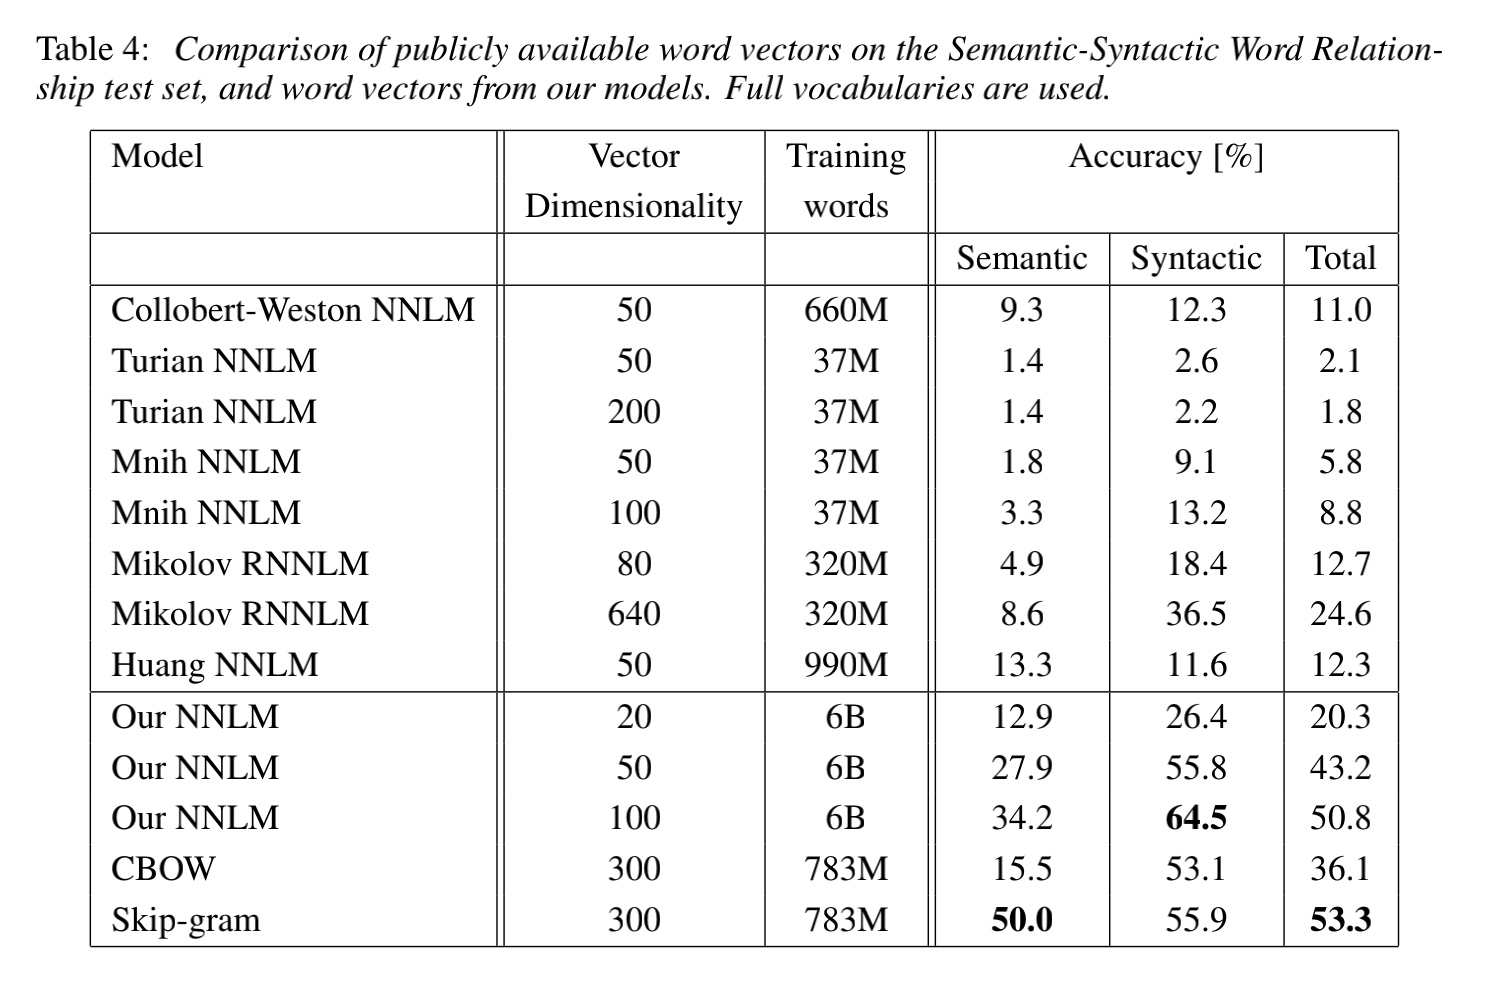

表4：语义-句法-词关系测试集上公开可用的词向量与我们模型中的词向量的比较。使用完整的词汇表。

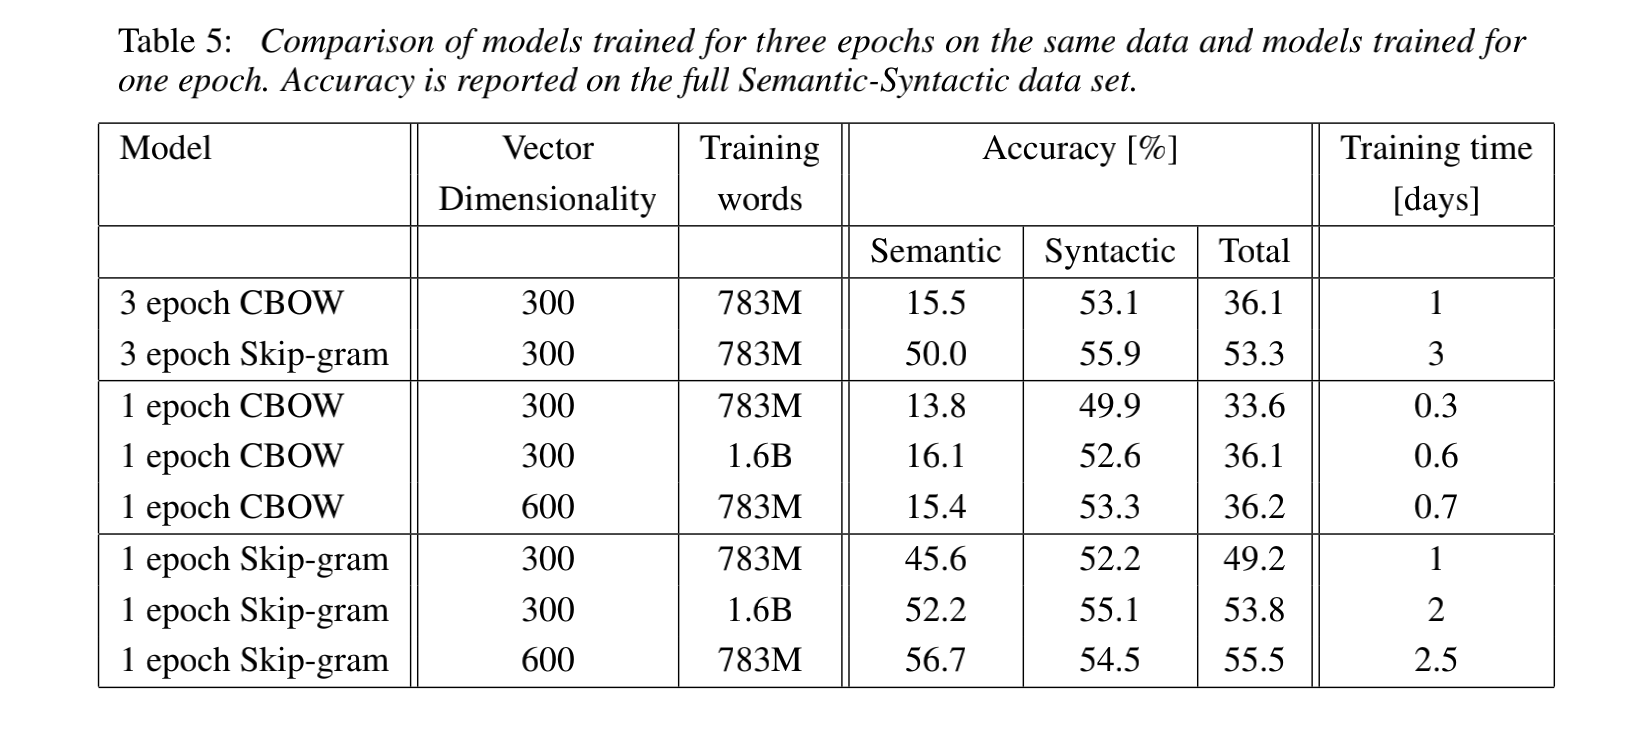

表5：同一数据下三个时期训练模型与一个时期训练模型的比较。完整的语义-句法数据集具有精确性。

Next, we evaluated our models trained using one CPU only and compared the results against publicly available word vectors. The comparison is given in Table 4. The CBOW model was trained on subset of the Google News data in about a day, while training time for the Skip-gram model was about three days.
For experiments reported further, we used just one training epoch (again, we decrease the learning rate linearly so that it approaches zero at the end of training). Training a model on twice as much data using one epoch gives comparable or better results than iterating over the same data for three epochs, as is shown in Table 5, and provides additional small speedup.

接下来，我们评估了仅使用一个CPU训练的模型，并将结果与公开可用的词向量进行了比较。比较见表4。CBOW模型在大约一天的时间内就被训练成了Google新闻数据的子集，而Skip gram模型的训练时间大约是三天。
对于进一步报道的实验，我们只使用了一个训练周期（再次，我们线性地降低学习率，使其在训练结束时接近于零）。如表5所示，使用一个历元在两倍多的数据上训练一个模型比在三个历元的相同数据上迭代得到的结果可比或更好，并且提供了额外的小加速。

### 4.4 Large Scale Parallel Training of Models

### 4.4 模型的大规模并行训练

As mentioned earlier, we have implemented various models in a distributed framework called DistBelief. Below we report the results of several models trained on the Google News 6B data set, with mini-batch asynchronous gradient descent and the adaptive learning rate procedure called Adagrad [7]. We used 50 to 100 model replicas during the training. The number of CPU cores is an estimate since the data center machines are shared with other production tasks, and the usage can fluctuate quite a bit. Note that due to the overhead of the distributed framework, the CPU usage of the CBOW model and the Skip-gram model are much closer to each other than their single-machine implementations. The result are reported in Table 6.

如前所述，我们在一个称为Dis  tBelief的分布式框架中实现了各种模型。下面我们报告在Google News 6B数据集上训练的几个模型的结果，这些模型使用了小批量异步梯度下降和称为Ada  grad的自适应学习率过程[7]。我们在训练中使用了50到100个模型副本。由于数据中心机器与其他生产任务共享，因此CPU核心的数量是一个估计值，而且使用情况可能会有很大的波动。注意，由于分布式框架的开销，CBOW模型和Skip-gram模型的CPU使用率比它们的单机实现更接近。结果见表6。

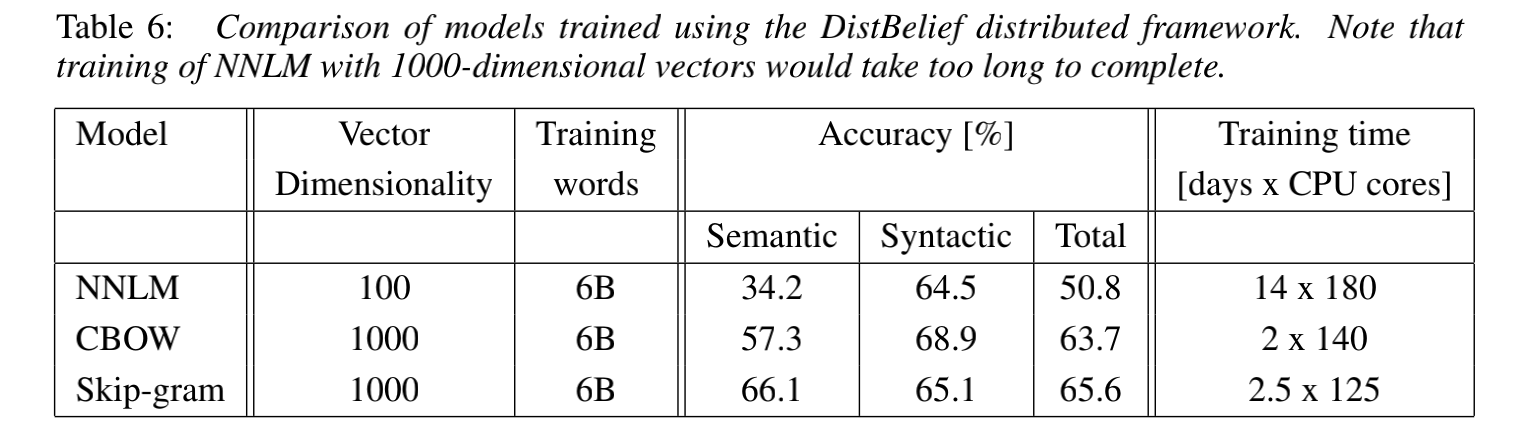

表6：使用DistCredit分布式框架训练的模型的比较。请注意，使用1000维向量训练NNLM将花费太长时间来完成。

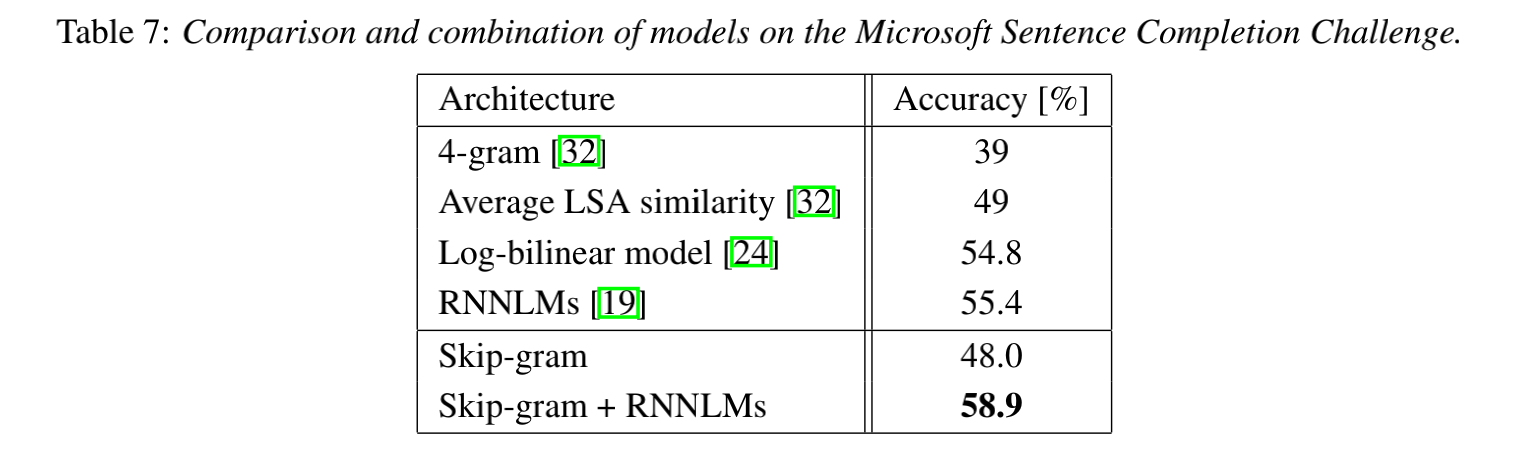

表7:Microsoft句子完成挑战的模型比较和组合。

### 4.5 Microsoft Research Sentence Completion Challenge

### 4.5 微软句子完成挑战

The Microsoft Sentence Completion Challenge has been recently introduced as a task for advancing language modeling and other NLP techniques [32]. This task consists of 1040 sentences, where one
word is missing in each sentence and the goal is to select word that is the most coherent with the rest of the sentence, given a list of five reasonable choices. Performance of several techniques has
been already reported on this set, including N-gram models, LSA-based model [32], log-bilinear model [24] and a combination of recurrent neural networks that currently holds the state of the art performance of 55.4% accuracy on this benchmark [19].
We have explored the performance of Skip-gram architecture on this task. First, we train the 640-dimensional model on 50M words provided in [32]. Then, we compute score of each sentence in the test set by using the unknown word at the input, and predict all surrounding words in a sentence.
The final sentence score is then the sum of these individual predictions. Using the sentence scores, we choose the most likely sentence.
A short summary of some previous results together with the new results is presented in Table 7. While the Skip-gram model itself does not perform on this task better than LSA similarity, the scores
from this model are complementary to scores obtained with RNNLMs, and a weighted combination leads to a new state of the art result 58.9% accuracy (59.2% on the development part of the set and 58.7% on the test part of the set).m

微软句子完成挑战最近被作为一项任务引入，以推进语言建模和其他NLP技术[32]。这个任务由1040个句子组成，其中
每个句子中都缺少单词，目标是选择与句子其余部分最连贯的单词，给出五个合理选择的列表。几种技术的性能
已经有关于这个集合的报道，包括N-gram模型、基于LSA的模型[32]、对数双线性模型[24]和目前在这个基准上保持55.4%精确度的最新性能的递归神经网络的组合[19]。
我们已经探索了跳过程序架构在这个任务中的性能。首先，我们用[32]中提供的50万字训练640维模型。然后，我们利用输入的未知词计算测试集中每个句子的分数，并预测出一个句子中所有的周边词。
最后一个句子的分数就是这些预测的总和。利用句子的分数，我们选择最有可能的句子。
表7简要总结了一些先前的结果和新的结果。尽管Skip-gram模型本身并没有比LSA相似性更好地执行此任务，但是
该模型与RNNLMs得到的分数是互补的，加权组合可以得到58.9%的准确率（59.2%在集的开发部分，58.7%在集的测试部分）。

### 5 Examples of the Learned Relationships

### 5 学习关系的例子

Table 8 shows words that follow various relationships. We follow the approach described above: the relationship is defined by subtracting two word vectors, and the result is added to another word. Thus for example, Paris - France + Italy = Rome. As it can be seen, accuracy is quite good, although there is clearly a lot of room for further improvements (note that using our accuracy metric that assumes exact match, the results in Table 8 would score only about 60%). We believe that word vectors trained on even larger data sets with larger dimensionality will perform significantly better, and will enable the development of new innovative applications. Another way to improve accuracy is to provide more than one example of the relationship. By using ten examples instead of one to form the relationship vector (we average the individual vectors together), we have observed improvement of accuracy of our best models by about 10% absolutely on the semantic-syntactic test.
It is also possible to apply the vector operations to solve different tasks. For example, we have observed good accuracy for selecting out-of-the-list words, by computing average vector for a list of words, and finding the most distant word vector. This is a popular type of problems in certain human intelligence tests. Clearly, there is still a lot of discoveries to be made using these techniques.

表8显示了遵循各种关系的单词。我们遵循上述方法：通过减去两个词向量来定义关系，并将结果添加到另一个词中。例如，巴黎-法国+意大利=罗马。可以看出，准确度是相当好的，尽管显然还有很大的改进空间（注意，使用我们假设准确匹配的准确度指标，表8中的结果将只得分约60%）。我们相信，在更大的数据集和更大的维度上训练的词向量将表现得更好，并将有助于开发新的创新应用程序。提高准确性的另一种方法是提供关系的多个示例。在语义句法测试中，我们用十个例子代替一个例子来构成关系向量（我们把各个向量平均在一起），我们观察到我们的最佳模型的准确率提高了10%左右。
也可以应用向量运算来解决不同的任务。例如，通过计算单词列表的平均向量并找到最远的单词向量，我们观察到了从列表中选择单词的良好精度。在某些人类智力测试中，这是一种常见的问题。显然，使用这些技术仍有很多发现要做。

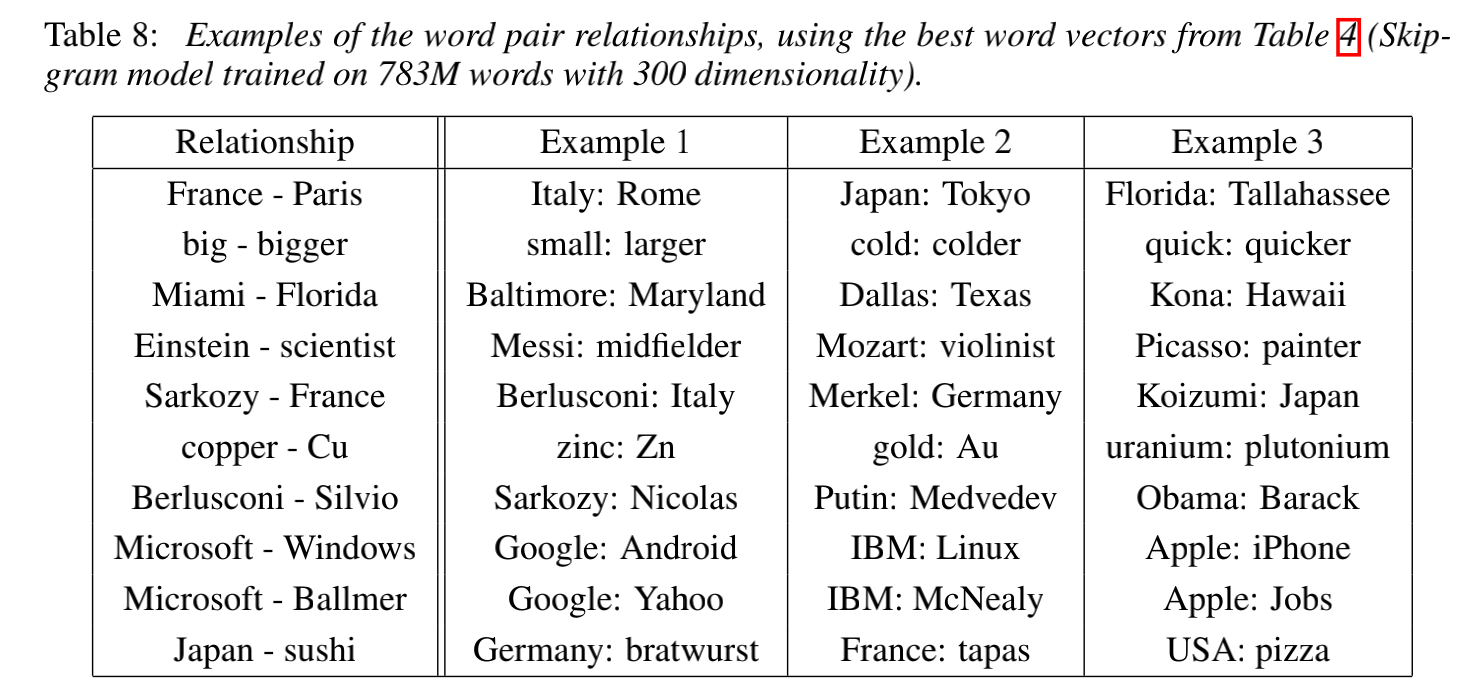

表8：词对关系的例子，使用表4中的最佳词向量（Skip  gram模型在300维783M词上训练）。

### 6 Conclusion

### 6 结论

In this paper we studied the quality of vector representations of words derived by various models on a collection of syntactic and semantic language tasks. We observed that it is possible to train high quality word vectors using very simple model architectures, compared to the popular neural network models (both feedforward and recurrent). Because of the much lower computational complexity, it is possible to compute very accurate high dimensional word vectors from a much larger data set. Using the DistBelief distributed framework, it should be possible to train the CBOW and Skip-gram models even on corpora with one trillion words, for basically unlimited size of the vocabulary. That is several orders of magnitude larger than the best previously published results for similar models. 
An interesting task where the word vectors have recently been shown to significantly outperform the previous state of the art is the SemEval-2012 Task 2 [11]. The publicly available RNN vectors were used together with other techniques to achieve over 50% increase in Spearman’s rank correlation over the previous best result [31]. The neural network based word vectors were previously applied to many other NLP tasks, for example sentiment analysis [12] and paraphrase detection [28]. It can be expected that these applications can benefit from the model architectures described in this paper.
Our ongoing work shows that the word vectors can be successfully applied to automatic extension of facts in Knowledge Bases, and also for verification of correctness of existing facts. Results from machine translation experiments also look very promising. In the future, it would be also interesting to compare our techniques to Latent Relational Analysis [30] and others. We believe that our comprehensive test set will help the research community to improve the existing techniques for estimating the word vectors. We also expect that high quality word vectors will become an important building block for future NLP applications.

在本文中，我们研究了在一组句法和语义语言任务中，由不同模型导出的词的向量表示的质量。我们观察到，与流行的神经网络模型（前馈和递归）相比，使用非常简单的模型结构训练高质量的词向量是可能的。由于计算复杂度低得多，因此可以从更大的数据集中计算非常精确的高维字向量。使用DistCredit分布式框架，即使是在包含1万亿个单词的语料库上，也应该能够训练CBOW和Skip gram模型，因为词汇的大小基本上是不受限制的。这比之前发布的同类模型的最佳结果大几个数量级。
一个有趣的任务是SemEval-2012任务2[11]，其中单词向量最近被证明显著优于先前的技术水平。公共可用的RNN向量与其他技术一起使用，使Spearman的秩相关比先前的最佳结果提高了50%以上[31]。基于神经网络的词向量先前应用于许多其他NLP任务，例如情绪分析[12]和释义检测[28]。可以预期，这些应用程序可以从本文描述的模型体系结构中受益。
我们正在进行的工作表明，字向量可以成功地应用于知识库中事实的自动扩展，也可以用于验证现有事实的正确性。机器翻译实验的结果也很有希望。在未来，将我们的技术与潜在的关系分析[30]和其他方法进行比较也是很有意思的。我们相信，我们的综合测试集将有助于研究界改进现有的估计词向量的技术。我们也期望高质量的词向量将成为未来NLP应用的重要组成部分。

### 7 Follow-Up Work

### 7 后续工作

After the initial version of this paper was written, we published single-machine multi-threaded C++ code for computing the word vectors, using both the continuous bag-of-words and skip-gram architectures4. The training speed is significantly higher than reported earlier in this paper, i.e. it is in the order of billions of words per hour for typical hyperparameter choices. We also published more than 1.4 million vectors that represent named entities, trained on more than 100 billion words. Some of our follow-up work will be published in an upcoming NIPS 2013 paper [21].

在本文的初始版本被写入后，我们使用单机多线程C++代码来计算单词向量，同时使用连续的单词袋和跳过的GraceCARI算法。训练速度明显高于文献报道，即对于典型的超参数选择，训练速度为每小时数十亿字。我们还发布了140多万个矢量，它们代表命名实体，训练了1000多亿个单词。我们的一些后续工作将在即将出版的NIPS 2013论文【21】中发表。